# Week 5 Notes

## Population growth models

$ \frac{dP}{dt} = k P $

$ P(t+\Delta t) = P(t) + \Delta t \cdot \frac{dP}{dt} $

$ P(t + \Delta t) = P(t) + \Delta t \cdot k P(t) $

$ \Delta t = 1 $, $ k = 0.1 $

$ P(t+1) = P(t) + kP(t) $

How can we find $ P(3) $.

We need to know what $ P(2) $ is.
Say $ P(2) = 10 $, then $ P(3) = P(2) + 0.1 \cdot P(2) = 11 $.

What if we don't know what $ P(2) $ is?  We have to go all the way back to $ P(0) $

#### Parameters of the model
* The initial population $ P(0) $
* The step size $ \Delta t $
* The growth rate $ k $
* The end point $ t_{fin} $

In [1]:
def pop_model1(pop_init,step_size,growth_rate,t_fin):
    pop_values_list = [pop_init]
    t_values = [t*step_size for t in range(int(t_fin/step_size)+1)]
    for t in t_values[1:]:
        current_pop = pop_values_list[-1]
        new_pop = current_pop + step_size*growth_rate*current_pop
        pop_values_list.append(new_pop)
    return t_values,pop_values_list

In [9]:
inputs,outputs = pop_model1(100,0.1,0.1,3)

In [1]:
import matplotlib.pyplot as plt

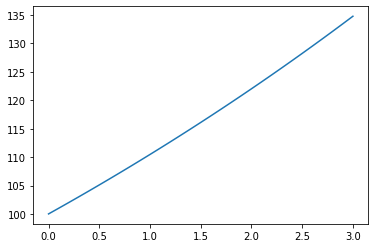

In [10]:
plt.plot(inputs,outputs)

$ \frac{dP}{dt} = k\sin^2(\frac{2\pi t}{N})P(t) $

$ P(t + \Delta t) = P(t) + \Delta t \cdot k\sin^2(\frac{2\pi t}{N})P(t) $

In [14]:
def pop_model2(pop_init,step_size,growth_rate,t_fin,N):             # model parameters are inputs
    pop_values_list = [pop_init]                                    # initialize pop list with initial pop
    t_values = [t*step_size for t in range(int(t_fin/step_size)+1)] # set up t-values interval using t_fin and step_size
    for t in t_values[1:]:                                          # for each t value
        current_pop = pop_values_list[-1]                           # grab the last value in the pop list
        new_pop = current_pop + step_size*growth_rate*(sin(2*pi*t/N)**2)*current_pop
                                                                    # use current pop to calculate the new pop using model
        pop_values_list.append(new_pop)                             # add pop value to list
    return t_values,pop_values_list                                 # return lists of t values and pop values

In [12]:
from math import sin, pi

In [15]:
inputs,outputs = pop_model2(100,0.1,0.1,3,1)

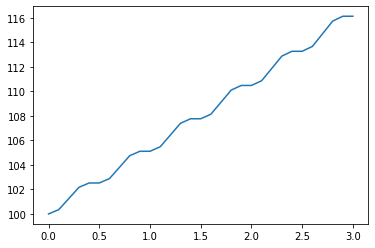

In [16]:
plt.plot(inputs,outputs)
plt.show()

## Bifurcation

#### Initial pop

In [10]:
def init_pop_bifurcation(pop_init_range,step_size,growth_rate,t_fin):        # model parameters are the inputs
    pop_values_list = []                                                     
    interval_length = pop_init_range[1] - pop_init_range[0]                  # length of the interval of initial pops
    init_pop_interval = [num/100 + pop_init_range[0] for num in range(0,int(interval_length)*100 + 1,
                                                                      int(interval_length))]
                                                                             # creates 100 plot points within the interval
                                                                             # of initial pops
    t_values = [t*step_size for t in range(int(t_fin/step_size)+1)]
    for init_pop in init_pop_interval:                                       # loop through the initial pops interval
        current_pop = init_pop
        for t in t_values[1:]:                                               # for each initial pop, calculate P(t_fin)
            current_pop = current_pop + step_size*growth_rate*current_pop
        pop_values_list.append(current_pop)                                  # add the P(t_fin) value to the list
    return init_pop_interval,pop_values_list                                 # return both lists

In [22]:
inputs,outputs = init_pop_bifurcation([1,3],0.1,-1.2,5)

In [24]:
def plot_init_bifurcation(pop_init_range,step_size,growth_rate,t_fin):
    inputs,outputs = init_pop_bifurcation(pop_init_range,step_size,growth_rate,t_fin)
    plt.plot(inputs,outputs)
    plt.xlabel('initial population')
    plt.ylabel('pop value at time $t=5$')
    plt.show

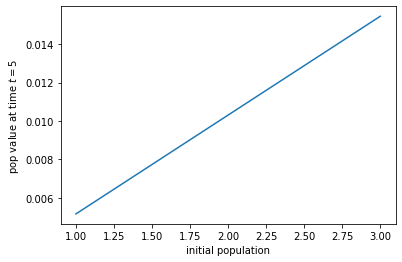

In [25]:
plot_init_bifurcation([1,3],0.1,-1,5)

### Graphing in a loop

The following function can be used as an outline for writing a function that will automatically graph a range of bifurcation curves in the same axes.

In [6]:
def loop_graph_example(parameters):
    inputs = [-1 + t/100 for t in range(201)]               # 100 plot points between -1 and 1
    for par in parameters:                                  # for each of the input parameters
        outputs = [x**2 + par*x for x in inputs]            # set up outputs
        plt.plot(inputs,outputs)                            # and plot the curve
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title('Quadratic functions')
    func_labels = ['$x^2 + {}x$'.format(par) for par in parameters]
                                                            # using string formatting to set up the list of function labels
    plt.legend(labels=func_labels)                          # create a legend using the function labels
    plt.show()

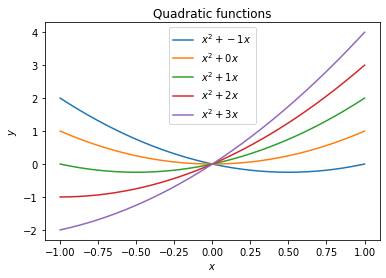

In [7]:
loop_graph_example([-1,0,1,2,3])